# Modèle sur mesure simple


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json
import sqlite3
import string
from collections import Counter
import re
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/projet_OCR_7_detecter_bad_buzz/training.1600000.processed.noemoticon.csv', encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.shape

(1599999, 6)

In [ ]:
df.columns = ["label", "ids", "date", "flag", "user", "text"]

## exploration data

In [ ]:
df.head()

,label,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.shape

(1599999, 6)

In [ ]:
#remplace tweet positif 4 par 1
df['label'] = df['label'].replace(4,1)

In [ ]:
df.isnull().sum()

label    0
ids      0
date     0
flag     0
user     0
text     0
dtype: int64

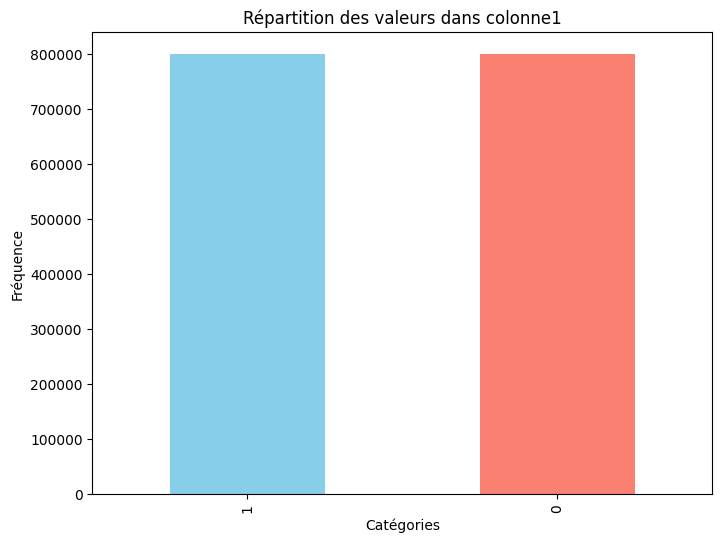

In [ ]:
import matplotlib.pyplot as plt

# Créer un graphique à barres
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'orange']

plt.figure(figsize=(8, 6))
df.label.value_counts().plot(kind='bar', color=colors[:len(df.label.value_counts())])

# Ajouter des titres et des étiquettes
plt.title('Répartition des valeurs dans colonne1')
plt.xlabel('Catégories')
plt.ylabel('Fréquence')

# Afficher le graphique
plt.show()

## Split the data

In [ ]:
X,y = df.text, df.label

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)


## modelisation

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
count = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
count.fit(X_train)

X_train = count.transform(X_train)
X_test = count.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## evaluation

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7991125

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.78      0.79    160108\n           1       0.79      0.82      0.80    159892\n\n    accuracy                           0.80    320000\n   macro avg       0.80      0.80      0.80    320000\nweighted avg       0.80      0.80      0.80    320000\n'

[[124597  35511]
 [ 28773 131119]]


<Axes: >

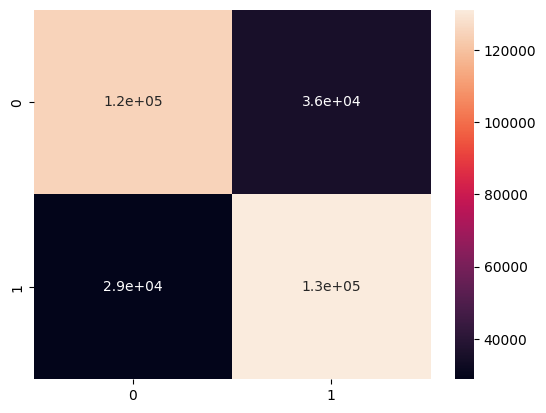

In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [ ]:
df_reduced = df[['target', 'tweet']]
df_reduced.head()

,target,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
df_reduced.shape

(1599999, 2)

In [ ]:
df_reduced.target.value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

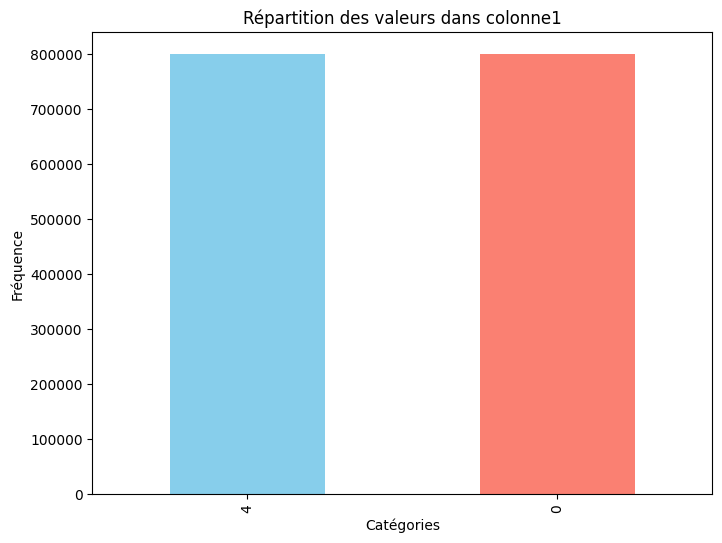

# Modèle sur mesure avancé

In [ ]:
df_reduced = df[['label', 'text']]
df_reduced.head()

,label,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
df['label'].value_counts()

label
1    800000
0    799999
Name: count, dtype: int64

In [ ]:
lab_to_sentiment = {0:"Negative", 1:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df_reduced.label = df_reduced.label.apply(lambda x: label_decoder(x))
df_reduced.head()

<ipython-input-34-375af5942d07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.label = df_reduced.label.apply(lambda x: label_decoder(x))


,label,text
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


In [ ]:
import random
random_idx_list = [random.randint(1,len(df_reduced.text)) for i in range(10)] # creates random indexes to choose from dataframe
df_reduced.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,label,text
43451,Negative,@rana__xx naww my neighbours are having a par...
486522,Negative,schools out for summer..actually for finals darn
1331192,Positive,Found my new fav flavor of coffee english tofe...
792083,Negative,Home with a belly ache
1291169,Positive,is loving the season finale of the hills!!
1193586,Positive,@TheChristinaKim position that the daylight is...
1166510,Positive,@samthesham I would if they weren't both decea...
268674,Negative,"Is packing last minute bits for holiday, upset..."
532851,Negative,At the dermatologists office
1217656,Positive,@daisyx @tenelilli haha! Absolutely! About to...


In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
    '''
    This function stems all the words in the text, removes stop words and remove unnecessary characters from text
    '''
    text = re.sub(text_cleaning_re,  ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
df_reduced['text'] = df_reduced['text'].apply(lambda x: preprocess(x))

<ipython-input-46-7df1ffd36c7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['text'] = df_reduced['text'].apply(lambda x: preprocess(x))


In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
train_data, test_data = train_test_split(df_reduced, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1279999
Test Data size 320000


## Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290658


In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['text']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['text']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1279999, 30)
Testing X Shape: (320000, 30)


In [ ]:
labels = train_data['label'].unique().tolist()
labels

['Positive', 'Negative']

In [ ]:
## Label Encoding
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data['sentiment'].to_list())
y_test = encoder.transform(test_data['sentiment'].to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

## Word Emdedding


In [ ]:
# Split the data into train and test sets
train, test = train_test_split(df_reduced, test_size=0.2, random_state=42)

# View the sizes of the train and test sets
print(f"Train set size: {len(train)}")
print(f"Test set size: {len(test)}")

In [ ]:
train_data = train.copy()
val_data = test.copy()

In [ ]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [ ]:
train_data.head()

In [ ]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

In [ ]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words='english', #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [ ]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [ ]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

In [ ]:
#Labels for train and test encoding
y_train_bow = reviews_train['sentiment']
y_test_bow = reviews_test['sentiment']

# Modèle avancé BERT